# Data Acquisition
From Asos website https://www.asos.com/search/?q=shoes&page=2

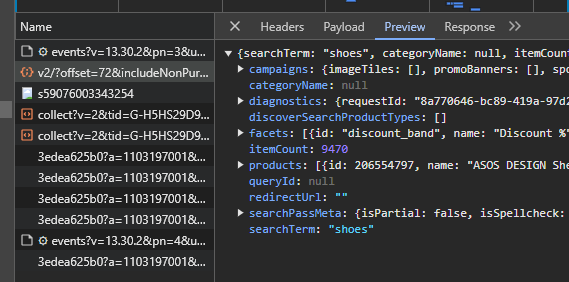

In [48]:
# Loading libraries
import requests
import json
import pandas as pd

In [49]:
# Fetching data from api
url = 'https://www.asos.com/api/product/search/v2/?offset=72&includeNonPurchasableTypes=restocking&q=shoes&store=ROW&lang=en-GB&currency=EUR&rowlength=3&channel=desktop-web&country=IE&keyStoreDataversion=mhabj1f-41&limit=72'


In [50]:
data = "offset=72&includeNonPurchasableTypes=restocking&q=shoes&store=ROW&lang=en-GB&currency=EUR&rowlength=3&channel=desktop-web&country=IE&keyStoreDataversion=mhabj1f-41&limit=72"


In [51]:
headers = {'accept': 'application/json, text/plain, */*',
'accept-encoding': 'gzip, deflate',
'accept-language': 'en-US,en;q=0.9,mr;q=0.8',
'asos-c-name': '@asosteam/asos-web-product-listing-page',
'asos-c-plat': 'web',
'asos-c-ver': '1.2.0-c3dbfdf8-90',
'asos-cid': '80540303-1bdf-4ce4-858b-507804cdeaae',
'cookie': 'browseCountry=IE; browseCurrency=EUR; browseLanguage=en-GB; browseSizeSchema=UK; storeCode=ROW; currency=19; s_ecid=MCMID%7C38755829175050667370808691236603999908; featuresId=b94616f7-e6bc-494b-bdf9-b049c11b8c86; _cs_c=0; _ga=GA1.1.1162803615.1729159158; FPID=FPID2.2.2ZZH%2BZ21wBraZ99X1PMEIYELCX4rSS0vmhM65Pt3QMQ%3D.1729159158; OptanonAlertBoxClosed=2024-10-17T09:59:21.427Z; eupubconsent-v2=CQGorZgQGorZgAcABBENBLF8AP_gAEPgAAYgKfwEwAMAB3AD4AJsAfoBRQEIAImATYApcBTYC8wGXAPrAjYBL8CekFMgU0gpsCn4KeQDAA-AD9AQgAiYBTYC8wGXAPrAnoBTICmoFPAAAAAA.f_wACHwAAAAA; OTAdditionalConsentString=1~230.318.540.737.1040.1166.1227.1548.1638.1651.1677.1703.1721.1765.1782.1786.1832.1917.1944.1987.2008.2039.2107.2140.2150.2177.2219.2292.2305.2312.2331.2370.2377.2387.2461.2493.2501.2535.2567.2569.2604.2612.2614.2643.2645.2650.2651.2784.2875.2898.2908.2920.3012.3017.3018.3048.3055.3112.3173.3185.3223.3227.3235.3293.3306.3309.3315.3328.3331.3731.8931.9731.13731.16931.27831.31631.32531.33631.34231.34631; _gcl_au=1.1.948985723.1729159162; bt_stdstatus=NOTSTUDENT; FPAU=1.1.948985723.1729159162; stc-welcome-message=cappedPageCount=2; optimizelyEndUserId=oeu1729159168655r0.4816726432835303; plp_columsCount=threeColumns; asosAffiliate=affiliateId=17295; bt_utmSource=organic_search; floor=1000; asos=currencyid=19&currencylabel=EUR&topcatid=1000; __gads=ID=b12012a37492e92e:T=1729176769:RT=1729198086:S=ALNI_MZUdWtju9FoNqddHvaLUTWbfABcgA; __eoi=ID=cb1e562e7046cd13:T=1729176769:RT=1729198086:S=AA-AfjajBVY3umTK17MsmT6Hjmnn; geocountry=IE; asos_drmlp=b9902a1be2e5955ccb96c6f8cc0f1a27; _abck=E7378A7A400E7514C3C01C066CEDB7B0~0~YAAQDWJkX24QjpmSAQAA7K1onwwo880808KvXSmAOy4crkKGB5wsupQHO+ONkNPtRPwXDH6zpJcUwPVAHFYTzsQBmC778tZt2Phv7a96vIHvuCLlcTxRr5O65cHxKJ86B36iRI+A92Utm7deuNod8TFnRFhaYqGzniCiVHpZU/MtY1qCQBoTYOcnWer4OFP59TJybLvPpp7r4PfdhYH7OBkRzYZ+GMI1gUQ3TgAiHrn5J0aTkucX8aSJ+9y/h8WrTHTkT5dTGN8BW/aM+VPkHhKEResKGsb9DTlS9no6hgR8NZ33HkdR37cjDPslrMriQxFgjdavulnjZIfWbpECeblsEn93YxqbCZ6yN/9cBOiAzUONImb1fWUyVV3lKFFVpdC+M7TGsgBL+mRguphBfSHw4nb/E+dX4SC9Rt8Oym+MGIes30+dgFTApL0S+oFIeYlyYYc/6r/0NraDlgX2Z9aKdktuAgiDfUEICiot~-1~-1~-1; siteChromeVersion=au=13&com=13&de=13&dk=13&es=13&fr=13&it=13&nl=13&pl=13&roe=13&row=13&ru=13&se=13&us=13; keyStoreDataversion=mhabj1f-41; asos-anon12=01929f68c13679978e5d59390dcbadc9; asos-ts121=01929f68-c139-71db-9acd-a4a334d2a609; asos-b-sdv629=mhabj1f-41; ak_bmsc=78BF77585004AEFC764EA6D7D5D6ABC3~000000000000000000000000000000~YAAQDWJkXwkSjpmSAQAAdMJonxnXN4ixr8Pid5Fplp9XI4tQkgY+Faenh0sL7blPo6E85w3XcUp1gj7Dres0yE5JlVkefeKRC2Nrdrxw47fYH31qpgRrWXXrrtRIQIIKybb5hE6/2F7fC8L7dJKZEzH8dT3cNP1Bl2dqK3zZ4tIowqulH/SObJm0khxNh30+hQX9b6yKaMTy7rzXs/ZCu0usWzHBfq+HwEr0hg2YaRLKdCApkqEa/iDs6jn+vMeOO8m+KrIGMZRCgxEPeiB5/zZEANirI26zm9zS7ClNm69Jp99p/mtvWirkobWX2d/UAM73L9O/Va69knsMp0/w1QAvBPkFo+s0MTFe0ULIeUD49IIw03foSCHEkc+xA0qrkfIRx8CPVzo=; AMCVS_C0137F6A52DEAFCC0A490D4C%40AdobeOrg=1; AMCV_C0137F6A52DEAFCC0A490D4C%40AdobeOrg=-1303530583%7CMCMID%7C38755829175050667370808691236603999908%7CMCAAMLH-1729856096%7C6%7CMCAAMB-1729856096%7CRKhpRz8krg2tLO6pguXWp5olkAcUniQYPHaMWWgdJ3xzPWQmdj0y%7CMCCIDH%7C0%7CMCOPTOUT-1729258496s%7CNONE%7CvVersion%7C3.3.0%7CMCAID%7CNONE; _s_fpv=true; s_cc=true; _cs_mk_aa=0.964717105377318_1729251299722; FPLC=A9CfJ6yAUKd153YcwjBtinSYlVW6LMY4GVI4t%2F0sz%2BLjnNcf3%2F%2BeIQqBK4E6gvRkGr%2BUKIJd5BAP6GqfYK05WBH9c%2FVqYgwPa71xGu1MZSmlnuJGBB8BmVkkIVag4g%3D%3D; FPGSID=1.1729251305.1729251305.G-H5HS29D9X2.evHmdTGbv_tQ2dI-TFtFfA; bm_sz=D1B4BED66DFC11B3957D1C409A345A65~YAAQDWJkX3AUjpmSAQAA5+honxlZzQR7l1SFV4z8MVrowgTEf6qIHKYCwJK2M6hsdZA8VhLuSb0ZnomAXbRMrj36RFVo21lsY+04RNjHdgthallTb3mMvc4WcxsI6dxk6b5AhF7Gm1E3egBeZCfzFM8VImQGcbBLLgMdHKV1AjKlKhTvfC1e823LCsTQahZZDoQq98skqH6mphmDWH5MLz/E765XSmBwfMBdfJngIN7j6jjUM9UjMlTWVzC+4RVmytGjh2uBJhaE+xpoCQ6TR8t3/aOJaz0IpsrahkKlQrZ45q6tA6T5xy0bOftpR5Ts0CwSdO/VnXwzfJr+LX3zB9WuRVss0vJynhhUpMYAS+kcQJnQ6SEjr1a44vavitylknGp6vvTXIJTFQpHASimjhSjR6dYuC4=~4405554~3356995; s_pers=%20s_vnum%3D1730419200098%2526vn%253D5%7C1730419200098%3B%20gpv_p6%3D%2520%7C1729253095588%3B%20eVar225%3D2%7C1729253108021%3B%20visitCount%3D5%7C1729253108024%3B%20gpv_e231%3D37dbcc1b-8db1-4021-bc6c-e91a182da8c1%7C1729253110109%3B%20s_invisit%3Dtrue%7C1729253110122%3B%20s_nr%3D1729251310124-Repeat%7C1760787310124%3B%20gpv_e47%3Dno%2520value%7C1729253110125%3B%20gpv_e198%3Db94616f7-e6bc-494b-bdf9-b049c11b8c86%7C1729253110128%3B%20gpv_p10%3Ddesktop%2520row%257Csearch%2520page%257Csuccessful%2520search%7C1729253110130%3B; OptanonConsent=isGpcEnabled=0&datestamp=Fri+Oct+18+2024+12%3A35%3A13+GMT%2B0100+(British+Summer+Time)&version=202401.2.0&browserGpcFlag=0&isIABGlobal=false&hosts=&consentId=63e0b9ad-12f3-4fbb-9935-c449c1bf602f&interactionCount=1&landingPath=NotLandingPage&groups=C0004%3A1%2CC0001%3A1%2CC0003%3A1%2CV2STACK42%3A1&geolocation=IE%3BL&AwaitingReconsent=false; _cs_id=17344412-4686-a315-9017-20855ca2eab2.1729159157.6.1729251313.1729251301.1628755191.1763323157066; _cs_s=2.0.0.1729253113413; _ga_H5HS29D9X2=GS1.1.1729251304.7.1.1729251315.60.0.1758779314; RT="z=1&dm=asos.com&si=5bed0991-c094-4c6e-8eb1-e051972da74d&ss=m2enkipi&sl=3&tt=93r&bcn=%2F%2F684dd32a.akstat.io%2F&ld=kpp&nu=370qxwu5&cl=tzf"; s_sq=asoscomprod%3D%2526c.%2526a.%2526activitymap.%2526page%253Ddesktop%252520row%25257Csearch%252520page%25257Csuccessful%252520search%2526link%253DLOAD%252520MORE%2526region%253Dplp%2526pageIDType%253D1%2526.activitymap%2526.a%2526.c',
'priority': 'u=1, i',
'referer': 'https://www.asos.com/search/?q=shoes&page=2',
'sec-ch-ua': '"Google Chrome";v="129", "Not=A?Brand";v="8", "Chromium";v="129"',
'sec-ch-ua-mobile': '?0',
'sec-ch-ua-platform': '"Windows"',
'sec-fetch-dest': 'empty',
'sec-fetch-mode': 'cors',
'sec-fetch-site': 'same-origin',
'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36'}


In [52]:
r = requests.get(url, data=data, headers=headers)

In [53]:
r

<Response [200]>

In [10]:
r.content

b'{"searchTerm":"shoes","categoryName":null,"itemCount":8947,"redirectUrl":"","products":[{"id":206633990,"name":"Be Mine Bridal Nelly bow flat shoes in ivory","price":{"current":{"value":33.0,"text":"\xe2\x82\xac33.00"},"previous":{"value":43.99,"text":"\xe2\x82\xac43.99"},"rrp":{"value":null,"text":""},"lowestPriceInLast30Days":{"value":33.0,"text":"\xe2\x82\xac33.00"},"isMarkedDown":true,"isOutletPrice":false,"currency":"EUR"},"colour":"","colourWayId":206633991,"brandName":"Be Mine","hasVariantColours":false,"hasMultiplePrices":false,"groupId":null,"productCode":135767866,"productType":"Product","url":"be-mine/be-mine-bridal-nelly-bow-flat-shoes-in-ivory/prd/206633990#colourWayId-206633991","imageUrl":"images.asos-media.com/products/be-mine-bridal-nelly-bow-flat-shoes-in-ivory/206633990-1-ivorysatin","additionalImageUrls":["images.asos-media.com/products/be-mine-bridal-nelly-bow-flat-shoes-in-ivory/206633990-2","images.asos-media.com/products/be-mine-bridal-nelly-bow-flat-shoes-in-

In [11]:
j=json.loads(r.content)
# json = data is same as data=json.dumps(data)
# data = data means json = json.loads(data)

In [12]:
j.keys()

dict_keys(['searchTerm', 'categoryName', 'itemCount', 'redirectUrl', 'products', 'facets', 'diagnostics', 'searchPassMeta', 'queryId', 'discoverSearchProductTypes', 'campaigns'])

In [13]:
pd.json_normalize(j['products'])

,id,name,colour,colourWayId,brandName,hasVariantColours,hasMultiplePrices,groupId,productCode,productType,...,price.current.text,price.previous.value,price.previous.text,price.rrp.value,price.rrp.text,price.lowestPriceInLast30Days.value,price.lowestPriceInLast30Days.text,price.isMarkedDown,price.isOutletPrice,price.currency
0,206633990,Be Mine Bridal Nelly bow flat shoes in ivory,,206633991,Be Mine,False,False,None,135767866,Product,...,€33.00,43.99,€43.99,None,,33.00,€33.00,True,False,EUR
1,206554691,ASOS DESIGN Wide Fit Shelley bow detail mid bl...,,206554695,ASOS DESIGN,False,False,None,135577041,Product,...,€34.99,NaN,,None,,NaN,,False,False,EUR
2,207031620,Public Desire Smooch strappy sling back kitten...,,207031622,Public Desire,False,False,None,137221981,Product,...,€43.99,NaN,,None,,NaN,,False,False,EUR
3,13929753,ASOS DESIGN brogue shoes in brown leather with...,,16577484,ASOS DESIGN,False,False,None,1604908,Product,...,€48.00,59.99,€59.99,None,,29.99,€29.99,True,False,EUR
4,202742989,Crocs classic clogs in lilac,,202743042,Crocs,False,False,None,118655994,Product,...,€50.00,NaN,,None,,NaN,,False,False,EUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,206535588,ASOS DESIGN Pressure platform high heeled shoe...,,206535589,ASOS DESIGN,False,False,None,135495229,Product,...,€44.99,NaN,,None,,NaN,,False,False,EUR
68,205772397,KOI Oversized Derby Shoes In Black,,205772398,Koi Footwear,False,False,None,133693009,Product,...,€116.99,NaN,,None,,NaN,,False,False,EUR
69,206711070,SEQWL Wide Fit pointed block heel shoes in bla...,,206711072,SEQWL Wide Fit,False,False,None,136049572,Product,...,€31.99,NaN,,None,,NaN,,False,False,EUR
70,206704048,SEQWL pointed block heeled shoes in black,,206704065,SEQWL,False,False,None,136007908,Product,...,€29.99,NaN,,None,,NaN,,False,False,EUR


# Features Extraction
asos_df consists 32 columns/features.
Out of this, key features can be extracted for further analysis.

In [14]:
asos_df = pd.json_normalize(j['products'])
print('Data types of each feature of asos_df\n',asos_df.dtypes)

Data types of each feature of asos_df
 id                                       int64
name                                    object
colour                                  object
colourWayId                              int64
brandName                               object
hasVariantColours                         bool
hasMultiplePrices                         bool
groupId                                 object
productCode                              int64
productType                             object
url                                     object
imageUrl                                object
additionalImageUrls                     object
videoUrl                                object
showVideo                                 bool
isSellingFast                             bool
isRestockingSoon                          bool
isPromotion                               bool
sponsoredCampaignId                     object
facetGroupings                          object
advertisement        

In [15]:
# Removing additional unnecessary features
#asos_df = asos_df.drop(columns = 'facetGroupings') #Empty data
asos_df = asos_df.drop(['additionalImageUrls','facetGroupings'], axis=1) #Empty data

In [16]:
for i in asos_df.columns:
  print('Length of unique values in',i, 'is',len(asos_df[i].unique()))

Length of unique values in id is 72
Length of unique values in name is 72
Length of unique values in colour is 1
Length of unique values in colourWayId is 72
Length of unique values in brandName is 19
Length of unique values in hasVariantColours is 1
Length of unique values in hasMultiplePrices is 1
Length of unique values in groupId is 1
Length of unique values in productCode is 72
Length of unique values in productType is 1
Length of unique values in url is 72
Length of unique values in imageUrl is 72
Length of unique values in videoUrl is 1
Length of unique values in showVideo is 1
Length of unique values in isSellingFast is 2
Length of unique values in isRestockingSoon is 1
Length of unique values in isPromotion is 2
Length of unique values in sponsoredCampaignId is 1
Length of unique values in advertisement is 1
Length of unique values in price.current.value is 32
Length of unique values in price.current.text is 32
Length of unique values in price.previous.value is 5
Length of uni

In [17]:
# asos_df = asos_df.drop(['colour','hasVariantColours', 'hasMultiplePrices', 'groupId','productType'], axis=1) #Empty or only unique data
# asos_df

# Selecting key features from asos_df, neglecting empty, irrelavant and repetitive features
key_features = asos_df[['id','name','colourWayId','brandName','productCode','isSellingFast','price.current.value','price.previous.value','price.lowestPriceInLast30Days.value','price.isMarkedDown','price.currency']]
key_features.rename(columns={
    'isSellingFast': 'sellingIsFast',
    'price.current.value': 'currentPrice',
    'price.previous.value': 'previousPrice',
    'price.lowestPriceInLast30Days.value': 'lowestPriceInLast30Days',
    'price.isMarkedDown': 'priceIsMarkedDown',
    'price.currency': 'currency'
}, inplace=True)
key_features

<ipython-input-17-4aad21adf3b3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_features.rename(columns={


,id,name,colourWayId,brandName,productCode,sellingIsFast,currentPrice,previousPrice,lowestPriceInLast30Days,priceIsMarkedDown,currency
0,206633990,Be Mine Bridal Nelly bow flat shoes in ivory,206633991,Be Mine,135767866,True,33.00,43.99,33.00,True,EUR
1,206554691,ASOS DESIGN Wide Fit Shelley bow detail mid bl...,206554695,ASOS DESIGN,135577041,True,34.99,NaN,NaN,False,EUR
2,207031620,Public Desire Smooch strappy sling back kitten...,207031622,Public Desire,137221981,False,43.99,NaN,NaN,False,EUR
3,13929753,ASOS DESIGN brogue shoes in brown leather with...,16577484,ASOS DESIGN,1604908,False,48.00,59.99,29.99,True,EUR
4,202742989,Crocs classic clogs in lilac,202743042,Crocs,118655994,True,50.00,NaN,NaN,False,EUR
...,...,...,...,...,...,...,...,...,...,...,...
67,206535588,ASOS DESIGN Pressure platform high heeled shoe...,206535589,ASOS DESIGN,135495229,True,44.99,NaN,NaN,False,EUR
68,205772397,KOI Oversized Derby Shoes In Black,205772398,Koi Footwear,133693009,False,116.99,NaN,NaN,False,EUR
69,206711070,SEQWL Wide Fit pointed block heel shoes in bla...,206711072,SEQWL Wide Fit,136049572,False,31.99,NaN,NaN,False,EUR
70,206704048,SEQWL pointed block heeled shoes in black,206704065,SEQWL,136007908,True,29.99,NaN,NaN,False,EUR


# Data Transformation

In [18]:
# Checking null vaules in selected features table
null_count = key_features.isnull().sum()
print('Null values in the each feature:\n',null_count)

Null values in the each feature:
 id                          0
name                        0
colourWayId                 0
brandName                   0
productCode                 0
sellingIsFast               0
currentPrice                0
previousPrice              67
lowestPriceInLast30Days    67
priceIsMarkedDown           0
currency                    0
dtype: int64


Features **'previousPrice'** and **'lowestPriceInLast30Days'** shows NAN values only when the feature **'priceIsMarkedDown'** is False. If **'priceIsMarkedDown'** is True then above two features are filled with their respective values. This observation concludes that as price value non changed these values assigned with NAN.

Logically, **'currentPrice'** can be copied to **'previousPrice'** and **'lowestPriceInLast30Days'** wherever NAN assigned.

In [19]:
key_features['previousPrice'].fillna(key_features['currentPrice'], inplace=True)
key_features['lowestPriceInLast30Days'].fillna(key_features['currentPrice'], inplace=True)

<ipython-input-19-6e9294d7f7b3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  key_features['previousPrice'].fillna(key_features['currentPrice'], inplace=True)
<ipython-input-19-6e9294d7f7b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_features['previousPrice'].fillna(key_features['currentPrice'], inplace=True)
<ipython-input-19-6e9

In [20]:
# Checking null vaules in selected features table after clean up
null_count = key_features.isnull().sum()
print('Null values in the each feature:\n',null_count)


Null values in the each feature:
 id                         0
name                       0
colourWayId                0
brandName                  0
productCode                0
sellingIsFast              0
currentPrice               0
previousPrice              0
lowestPriceInLast30Days    0
priceIsMarkedDown          0
currency                   0
dtype: int64


In [21]:
# Data after replacing NAN values
key_features

,id,name,colourWayId,brandName,productCode,sellingIsFast,currentPrice,previousPrice,lowestPriceInLast30Days,priceIsMarkedDown,currency
0,206633990,Be Mine Bridal Nelly bow flat shoes in ivory,206633991,Be Mine,135767866,True,33.00,43.99,33.00,True,EUR
1,206554691,ASOS DESIGN Wide Fit Shelley bow detail mid bl...,206554695,ASOS DESIGN,135577041,True,34.99,34.99,34.99,False,EUR
2,207031620,Public Desire Smooch strappy sling back kitten...,207031622,Public Desire,137221981,False,43.99,43.99,43.99,False,EUR
3,13929753,ASOS DESIGN brogue shoes in brown leather with...,16577484,ASOS DESIGN,1604908,False,48.00,59.99,29.99,True,EUR
4,202742989,Crocs classic clogs in lilac,202743042,Crocs,118655994,True,50.00,50.00,50.00,False,EUR
...,...,...,...,...,...,...,...,...,...,...,...
67,206535588,ASOS DESIGN Pressure platform high heeled shoe...,206535589,ASOS DESIGN,135495229,True,44.99,44.99,44.99,False,EUR
68,205772397,KOI Oversized Derby Shoes In Black,205772398,Koi Footwear,133693009,False,116.99,116.99,116.99,False,EUR
69,206711070,SEQWL Wide Fit pointed block heel shoes in bla...,206711072,SEQWL Wide Fit,136049572,False,31.99,31.99,31.99,False,EUR
70,206704048,SEQWL pointed block heeled shoes in black,206704065,SEQWL,136007908,True,29.99,29.99,29.99,False,EUR


Visualization of features.

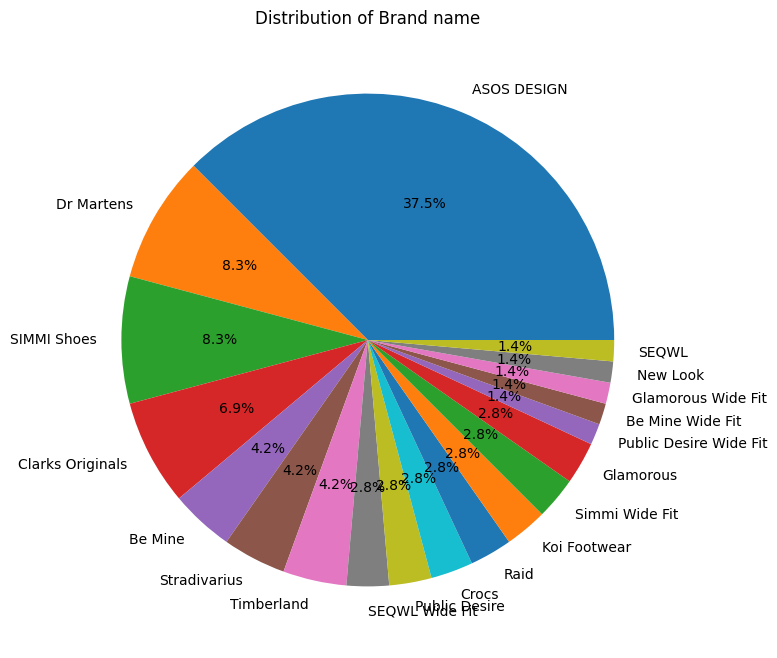

In [22]:
# Plotting pie chart for brand name.
# key_features['brandName'].value_counts()
import matplotlib.pyplot as plt
import seaborn as sns
key_features['brandName'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.title('Distribution of Brand name')
plt.ylabel('')
plt.show()

# Encoded the brandName
# key_features['brandName_encoded'] = pd.Categorical(key_features['brandName']).codes

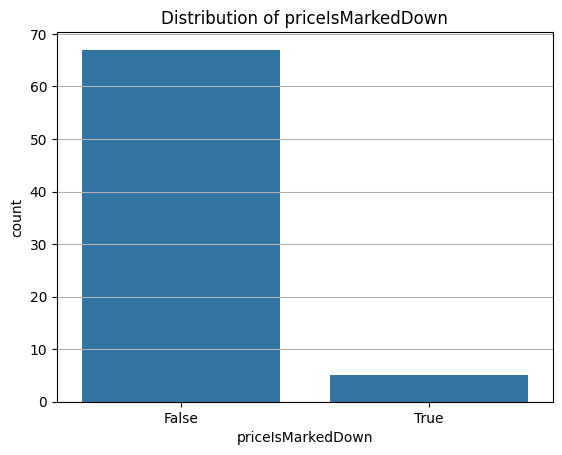

In [23]:
# Plotting bar chart for 'priceIsMarkedDown'

sns.countplot(x='priceIsMarkedDown', data=key_features)
#plt.xticks(rotation=30)
plt.title('Distribution of priceIsMarkedDown')
plt.grid(axis='y')
plt.show()
# key_features['priceIsMarkedDown'].value_counts()

# Converting this boolean feature into binary integers.
# key_features['priceIsMarkedDown'] = key_features['priceIsMarkedDown'].astype(int)

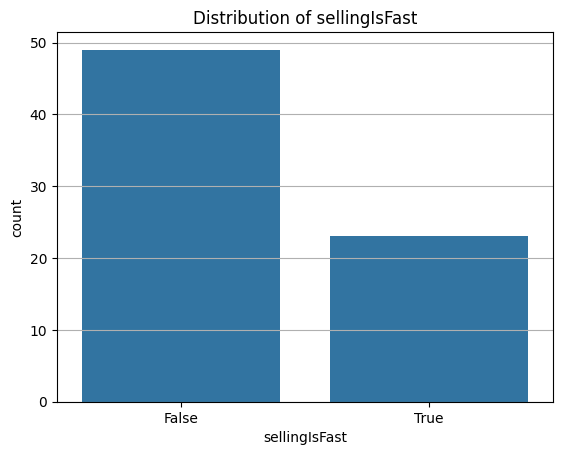

In [24]:
# Plotting bar chart for 'sellingIsFast'
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='sellingIsFast', data=key_features)
#plt.xticks(rotation=30)
plt.title('Distribution of sellingIsFast')
plt.grid(axis='y')
plt.show()


# Converting this boolean feature into binary integers.
# key_features['sellingIsFast'] = key_features['sellingIsFast'].astype(int)

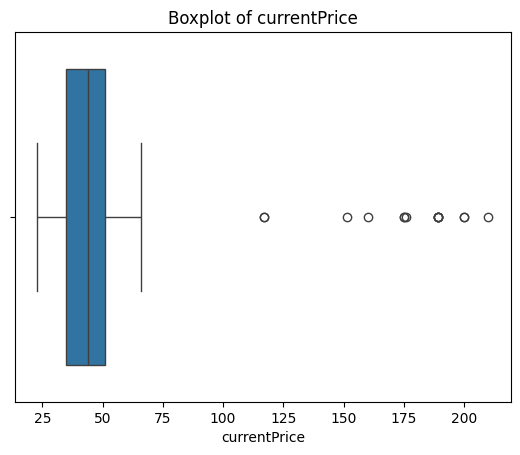

<ipython-input-25-459ce5dd1027>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_features['price_range_indicator'] = pd.cut(key_features['currentPrice'], bins=[0, A, B, C, D], labels=['Low', 'Medium', 'High', 'Very High'])


In [25]:
# Plotting boxplot for currentPrice
sns.boxplot(x=key_features['currentPrice'])
plt.title('Boxplot of currentPrice')
plt.show()
# Outliers observed on positive side of boxplot.

#min(key_features['currentPrice'])
#key_features['currentPrice'].median()

# Adding new feature: Price Range Indicator
A = key_features['currentPrice'].quantile(0.25)
B = key_features['currentPrice'].quantile(0.75)
C = key_features['currentPrice'].quantile(0.75)+1.5*(key_features['currentPrice'].quantile(0.75)-key_features['currentPrice'].quantile(0.25))
D = max(key_features['currentPrice'])
key_features['price_range_indicator'] = pd.cut(key_features['currentPrice'], bins=[0, A, B, C, D], labels=['Low', 'Medium', 'High', 'Very High'])

In [26]:
# Adding new feature; Discount percentage in %.
key_features['discount_percentage'] = ((key_features['previousPrice'])-(key_features['currentPrice']))/(key_features['previousPrice'])*100
key_features['discount_percentage'] = key_features['discount_percentage'].round(1)
key_features['discount_percentage'] = key_features['discount_percentage'].fillna(0).clip(lower=0)

<ipython-input-26-fe594565d010>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_features['discount_percentage'] = ((key_features['previousPrice'])-(key_features['currentPrice']))/(key_features['previousPrice'])*100
<ipython-input-26-fe594565d010>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_features['discount_percentage'] = key_features['discount_percentage'].round(1)
<ipython-input-26-fe594565d010>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [27]:
# Adding new feature; Lowest price tag: It will show up to customer only if it is True
key_features['lowest_price_tag'] = key_features['currentPrice'] == key_features['lowestPriceInLast30Days']

<ipython-input-27-2d852e0f9376>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_features['lowest_price_tag'] = key_features['currentPrice'] == key_features['lowestPriceInLast30Days']


In [42]:
# Data after encoding and adding new features
key_features

,id,name,colourWayId,brandName,productCode,sellingIsFast,currentPrice,previousPrice,lowestPriceInLast30Days,priceIsMarkedDown,currency,price_range_indicator,discount_percentage,lowest_price_tag
0,206633990,Be Mine Bridal Nelly bow flat shoes in ivory,206633991,Be Mine,135767866,True,33.00,43.99,33.00,True,EUR,Low,25.0,True
1,206554691,ASOS DESIGN Wide Fit Shelley bow detail mid bl...,206554695,ASOS DESIGN,135577041,True,34.99,34.99,34.99,False,EUR,Low,0.0,True
2,207031620,Public Desire Smooch strappy sling back kitten...,207031622,Public Desire,137221981,False,43.99,43.99,43.99,False,EUR,Medium,0.0,True
3,13929753,ASOS DESIGN brogue shoes in brown leather with...,16577484,ASOS DESIGN,1604908,False,48.00,59.99,29.99,True,EUR,Medium,20.0,False
4,202742989,Crocs classic clogs in lilac,202743042,Crocs,118655994,True,50.00,50.00,50.00,False,EUR,Medium,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,206535588,ASOS DESIGN Pressure platform high heeled shoe...,206535589,ASOS DESIGN,135495229,True,44.99,44.99,44.99,False,EUR,Medium,0.0,True
68,205772397,KOI Oversized Derby Shoes In Black,205772398,Koi Footwear,133693009,False,116.99,116.99,116.99,False,EUR,Very High,0.0,True
69,206711070,SEQWL Wide Fit pointed block heel shoes in bla...,206711072,SEQWL Wide Fit,136049572,False,31.99,31.99,31.99,False,EUR,Low,0.0,True
70,206704048,SEQWL pointed block heeled shoes in black,206704065,SEQWL,136007908,True,29.99,29.99,29.99,False,EUR,Low,0.0,True


In [47]:
key_features.brandName.unique()

array(['Be Mine', 'ASOS DESIGN', 'Public Desire', 'Crocs', 'Dr Martens',
       'Raid', 'Stradivarius', 'SIMMI Shoes', 'New Look',
       'Be Mine Wide Fit', 'Simmi Wide Fit', 'Clarks Originals',
       'Glamorous Wide Fit', 'Timberland', 'Glamorous', 'SEQWL Wide Fit',
       'Public Desire Wide Fit', 'Koi Footwear', 'SEQWL'], dtype=object)

# Loading Data

In [44]:
import sqlite3
connection = sqlite3.connect('asos.db', check_same_thread=False)
key_features.to_sql('asos_data', connection, if_exists='append', index=False)
cursor = connection.cursor()

In [45]:
cursor.execute("SELECT * FROM asos_data")
rows = cursor.fetchall()
rows

[(206633990,
  'Be Mine Bridal Nelly bow flat shoes in ivory',
  206633991,
  'Be Mine',
  135767866,
  1,
  33.0,
  43.99,
  33.0,
  1,
  'EUR',
  'Low',
  25.0,
  1),
 (206554691,
  'ASOS DESIGN Wide Fit Shelley bow detail mid block heeled shoes in leopard',
  206554695,
  'ASOS DESIGN',
  135577041,
  1,
  34.99,
  34.99,
  34.99,
  0,
  'EUR',
  'Low',
  0.0,
  1),
 (207031620,
  'Public Desire Smooch strappy sling back kitten heeled shoes in patent leopard print',
  207031622,
  'Public Desire',
  137221981,
  0,
  43.99,
  43.99,
  43.99,
  0,
  'EUR',
  'Medium',
  0.0,
  1),
 (13929753,
  'ASOS DESIGN brogue shoes in brown leather with natural sole and colour details',
  16577484,
  'ASOS DESIGN',
  1604908,
  0,
  48.0,
  59.99,
  29.99,
  1,
  'EUR',
  'Medium',
  20.0,
  0),
 (202742989,
  'Crocs classic clogs in lilac',
  202743042,
  'Crocs',
  118655994,
  1,
  50.0,
  50.0,
  50.0,
  0,
  'EUR',
  'Medium',
  0.0,
  1),
 (206242910,
  'ASOS DESIGN Wide Fit Stroll slingba

In [ ]:
!pip install Flask


In [ ]:
from flask import Flask
from flask import render_template
from flask import request
!pip install flask_cors
from flask_cors import CORS

In [ ]:
app = Flask(__name__)
CORS(app)

In [ ]:
@app.route("/getShoes", methods=['GET']) #Get Shoes
def get():
  cursor.execute("SELECT * FROM asos_data")
  rows = cursor.fetchall()
  Results=[]
  for row in rows: #Format the Output Results and get to return string
    Result={}
    Result['id']=row[0]
    Result['name']=row[1]
    Result['colourWayId']=row[2]
    Result['brandName']=row[3]
    Result['productCode']=row[4]
    Result['sellingIsFast']=row[5]
    Result['currentPrice']=row[6]
    Result['previousPrice']=row[7]
    Result['lowestPriceInLast30Days']=row[8]
    Result['priceIsMarkedDown']=row[9]
    Result['currency']=row[10]
    Results['brandName_encoded']=row[11]
    Result['price_range_indicator']=row[12]
    Result['discount_percentage']=row[13]
    Result['lowest_price_tag']=row[14]
    Results.append(Result)
  response={'Results':Results, 'count':len(Results)}
  ret=app.response_class(
    response=json.dumps(response),
    status=200,
    mimetype='application/json'
  )
  return ret #Return the data in a string format


In [ ]:
if __name__ == "__main__":
  #app.run(host='0.0.0.0',port='8080') #Run the flask app at port 8080
  app.run(host='0.0.0.0',port='5000', debug=True) #Run the flask app at port 8080
  #app.run(host='0.0.0.0',port='8080', ssl_context=('cert.pem', 'privkey.pem')) #Run the flask app at port 8080


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
print('Data types of each feature \n',key_features.dtypes)
key_features.head()


Data types of each feature 
 id                            int64
name                         object
colourWayId                   int64
brandName                    object
productCode                   int64
sellingIsFast                 int64
currentPrice                float64
previousPrice               float64
lowestPriceInLast30Days     float64
priceIsMarkedDown             int64
currency                     object
brandName_encoded              int8
price_range_indicator      category
discount_percentage         float64
lowest_price_tag               bool
dtype: object


,id,name,colourWayId,brandName,productCode,sellingIsFast,currentPrice,previousPrice,lowestPriceInLast30Days,priceIsMarkedDown,currency,brandName_encoded,price_range_indicator,discount_percentage,lowest_price_tag
0,206734006,Simmi London Landen heeled court shoe in Leopa...,206734008,SIMMI Shoes,136122643,0,43.99,43.99,43.99,0,EUR,15,Medium,0.0,True
1,206535415,ASOS DESIGN Wide Fit Panther pointed slingback...,206535421,ASOS DESIGN,135495182,1,19.24,34.99,24.50,1,EUR,0,Low,45.0,False
2,206734665,Simmi London Wide Fit Landen heeled court shoe...,206734674,Simmi Wide Fit,136123319,0,30.79,43.99,37.39,1,EUR,17,Low,30.0,False
3,206734091,Simmi London Lailla Heeled slingback court sho...,206734092,SIMMI Shoes,136122645,0,35.69,50.99,38.24,1,EUR,15,Medium,30.0,False
4,207117237,Buffalo lace up chunky shoe in black,207117238,Buffalo,137797853,0,45.43,69.90,52.42,1,EUR,4,Medium,35.0,False


Downloaded and uploaded this .py file to https://github.dev/avinashd144/pda_20032381

Below lines added/updated to this code to make perform get data, visualize table using home.html and add shoes data using addShoes.html

"""# Loading Data"""

import sqlite3
connection = sqlite3.connect('asos_1.db', check_same_thread=False)
key_features_1.to_sql('asos_data_1', connection, if_exists='append', index=False)
cursor = connection.cursor()

cursor.execute("SELECT * FROM asos_data_1")
rows = cursor.fetchall()
rows


from flask import Flask
from flask import render_template
from flask import request

from flask_cors import CORS

app = Flask(__name__)
CORS(app)

@app.route("/home.html") # Default-show data
def home():
    return render_template("home.html")

@app.route("/addShoes", methods=['GET','POST']) # Add shoes
def addShoes():
  if request.method == 'POST':
    Id = request.form['id']
    name = request.form['name']
    colourWayId = request.form['colourWayId']
    brandName = request.form['brandName']
    productCode = request.form['productCode']
    sellingIsFast = request.form['sellingIsFast']
    currentPrice = request.form['currentPrice']
    previousPrice = request.form['previousPrice']
    lowestPriceInLast30Days = request.form['lowestPriceInLast30Days']
    priceIsMarkedDown = request.form['priceIsMarkedDown']
    currency = request.form['currency']
    #brandName_encoded = request.form['brandName_encoded']
    #brandName = request.form['brandName']
    price_range_indicator = request.form['price_range_indicator']
    discount_percentage = request.form['discount_percentage']
    lowest_price_tag = request.form['lowest_price_tag']
    #print(name,colourWayId,brandName,productCode,sellingIsFast,currentPrice,previousPrice,lowestPriceInLast30Days,priceIsMarkedDown,currency,price_range_indicator,discount_percentage,lowest_price_tag)
    #print(name,colourWayId)
    cursor = connection.cursor() #create a connection to the SQL instance
    #s='''INSERT INTO asos_data(name, colourWayId, brandName, productCode, sellingIsFast, currentPrice, previousPrice, lowestPriceInLast30Days, priceIsMarkedDown, currency, brandName_encoded, price_range_indicator, discount_percentage, lowest_price_tag) VALUES('{}','{}','{}','{}','{}','{}','{}','{}','{}','{}','{}','{}','{}','{}');'''.format(name, colourWayId, brandName, productCode, sellingIsFast, currentPrice, previousPrice, lowestPriceInLast30Days, priceIsMarkedDown, currency, brandName_encoded, price_range_indicator, discount_percentage, lowest_price_tag)
    s='''INSERT INTO asos_data_1(Id, name, colourWayId, brandName, productCode, sellingIsFast, currentPrice, previousPrice, lowestPriceInLast30Days, priceIsMarkedDown, currency, price_range_indicator, discount_percentage, lowest_price_tag) VALUES('{}','{}','{}','{}','{}','{}','{}','{}','{}','{}','{}','{}','{}','{}');'''.format(Id, name, colourWayId, brandName, productCode, sellingIsFast, currentPrice, previousPrice, lowestPriceInLast30Days, priceIsMarkedDown, currency, price_range_indicator, discount_percentage, lowest_price_tag)
    app.logger.info(s)
    cursor.execute(s)
    connection.commit()
    app.config['DEBUG'] = True

  else:
    return render_template('addShoes.html')
  return '{"Result":"Success"}'

@app.route("/getShoes", methods=['GET']) #Get Shoes
def get():
  cursor.execute("SELECT * FROM asos_data_1")
  rows = cursor.fetchall()
  Results=[]
  for row in rows: #Format the Output Results and get to return string
    Result={}
    Result['id']=row[0]
    Result['name']=row[1]
    Result['colourWayId']=row[2]
    Result['brandName']=row[3]
    Result['productCode']=row[4]
    Result['sellingIsFast']=row[5]
    Result['currentPrice']=row[6]
    Result['previousPrice']=row[7]
    Result['lowestPriceInLast30Days']=row[8]
    Result['priceIsMarkedDown']=row[9]
    Result['currency']=row[10]
    #Result['brandName_encoded']=row[11]
    #Result['brandName']=row[11]
    Result['price_range_indicator']=row[11]
    Result['discount_percentage']=row[12]
    Result['lowest_price_tag']=row[13]
    Results.append(Result)
  response={'Results':Results, 'count':len(Results)}
  ret=app.response_class(
    response=json.dumps(response),
    status=200,
    mimetype='application/json'
  )
  return ret #Return the data in a string format

if __name__ == "__main__":
  #app.run(host='0.0.0.0',port='8080') #Run the flask app at port 8080
  app.run(host='0.0.0.0',port='8080', ssl_context=('cert.pem', 'privkey.pem')) #Run the flask app at port 8080
  #app.run(host='0.0.0.0',port='5000', debug=True) #Run the flask app at port 8080


# home.html to tabulate data
<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8">
<meta name="viewport" content="width=device-width", initial-scale="1.0">
<title>Test API Client</title>
<style>
  body {
    font-family: Arial, sans-serif;
    margin: 20px;
    background-color: rgb(130, 156, 155);
  }
  button {
    padding: 10px 15px;
    background-color: rgb(141, 160, 137);
    color: rgb(129, 22, 22);
    border: none;
    border-radius: 5px;
    cursor: pointer;
  }
  button:hover {
    background-color: rgb(22, 141, 42);
  }
  table {
    width: 100%;
    border-collapse: collapse;
    margin-top: 20px;
    background-color: rgb(62, 128, 128);
  }
  th, td {
    border: 1px solid #ddd;
    padding: 8px;
    text-align: left;
  }
  tr:hover {
    background-color: hsl(244, 61%, 59%);
  }
</style>
<script>
let doIt=()=>{
  let button = document.querySelector("button");
  button.disabled = true; // Disable the button after the first click
  let tab=document.getElementById("tab1");
  let rows=tab1.getElementsByTagName('tr');
  fetch('https://avinash.uksouth.cloudapp.azure.com:8080/getShoes')
    .then(response => response.json())
    .then(data=>data.Results.forEach(  //.slice(0,3)
      x=>{
        let newRow=rows[0].cloneNode(true);
        let divs=newRow.getElementsByTagName('td');
        divs[0].innerHTML=x['id'];
        divs[1].innerHTML=x['name'];
        divs[2].innerHTML=x['colourWayId'];
        divs[3].innerHTML=x['brandName'];
        divs[4].innerHTML=x['productCode'];
        divs[5].innerHTML=x['sellingIsFast'];
        divs[6].innerHTML=x['currentPrice'];
        divs[7].innerHTML=x['previousPrice'];
        divs[8].innerHTML=x['lowestPriceInLast30Days'];
        divs[9].innerHTML=x['priceIsMarkedDown'];
        divs[10].innerHTML=x['currency'];
        // divs[11].innerHTML=x['brandName_encoded'];
        // divs[11].innerHTML=x['brandName'];
        divs[11].innerHTML=x['price_range_indicator'];
        divs[12].innerHTML=x['discount_percentage'];
        divs[13].innerHTML=x['lowest_price_tag'];
        <!--tab1.appendChild(newRow)-->
        tab1.insertBefore(newRow, rows[1]);
      }
    )
  );
}
</script>
</head>
<body>
<button onClick="doIt()">Press me</button>
Asos Shoes Data: <br/>
<table id='tab1' bgcolor='white'>
<tr><td>ID</td><td>Name</td><td>ColourWayId</td><td>BrandName</td><td>ProductCode</td><td>SellingIsFast</td><td>CurrentPrice</td><td>PreviousPrice</td><td>LowestPriceInLast30Days</td><td>PriceIsMarkedDown</td><td>Currency</td><td>Price_range_indicator</td><td>Discount_percentage</td><td>Lowest_price_tag</td></tr>
</table></body>
</html>

# addShoes.html file help to insert new row
<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8">
<meta name="viewport" content="width=device-width">
<title>Add Shoes Data</title>
</head>
<body>
  <form action="/addShoes" method="POST">

    <!--ID (Nine Digit Unique Number): <input type="number", name="id"><br/><br/>       -->
    <!-- ID -->
    <!-- ID (Nine Digit Unique Number):  -->
    <!-- <lable for = "fid">ID</lable> -->
    <!-- <input type="number" maxlength="9" minlength="9" name="id" id="fid" required  -->
           <!-- pattern="\d{9}" title="ID must be a nine-digit number."><br/><br/> -->
    <label for="fid">ID (Nine Digit Unique Number):</label>
    <input type="text" name="id" id="fid" required
    pattern="^\d{9}$" title="ID must be a nine-digit number."
    oninput="this.value = this.value.replace(/[^0-9]/g, '');"
    maxlength="9" minlength="9"><br/><br/>

    <!-- Name:  -->
    <!-- <lable for = "fname">ID</lable>
    <input type="text", name="name" id="fname" required ><br/><br/> -->
    <label for="fname">Name:</label>
    <input type="text" name="name" id="fname" required
    pattern="[A-Za-z]+" title="Please enter only alphabetic characters."><br/><br/>

    <!-- ColourWayId ():  -->
    <!-- <input type="number", name="colourWayId"><br/><br/> -->
    <label for="fcolourWayId">ColourWayId(Nine Digit Number):</label>
    <input type="text" name="colourWayId" id="fcolourWayId" required
    pattern="^\d{9}$" title="ID must be a nine-digit number."
    oninput="this.value = this.value.replace(/[^0-9]/g, '');"
    maxlength="9" minlength="9"><br/><br/>

    <!-- BrandName:
    <input type="text", name="brandName"><br/><br/> -->
    <label for="fbrandName">BrandName:</label>
    <select id="fbrandName" name="brandName">
        <option value="Be Mine">Be Mine</option>
        <option value="ASOS DESIGN">ASOS DESIGN</option>
        <option value="Public Desire">Public Desire</option>
        <option value="Crocs">Crocs</option>
        <option value="Dr Martens">Dr Martens</option>
        <option value="Raid">Raid</option>
        <option value="Stradivarius">Stradivarius</option>
        <option value="SIMMI Shoes">SIMMI Shoes</option>
        <option value="New Look">New Look</option>
        <option value="Be Mine Wide Fit">Be Mine Wide Fit</option>
        <option value="Simmi Wide Fit">Simmi Wide Fit</option>
        <option value="Clarks Originals">Clarks Originals</option>
        <option value="Glamorous Wide Fit">Glamorous Wide Fit</option>
        <option value="Timberland">Timberland</option>
        <option value="Glamorous">Glamorous</option>
        <option value="SEQWL Wide Fit">SEQWL Wide Fit</option>
        <option value="Public Desire Wide Fit">Public Desire Wide Fit</option>
        <option value="Koi Footwear">Koi Footwear</option>
        <option value="SEQWL">SEQWL</option>
    </select><br/><br/>


    <!-- ProductCode (Nine Digit Number): -->
    <label for="fproductCode">ProductCode(Nine Digit Number):</label>
    <input type="text" name="productCode" id="fproductCode" required
    pattern="^\d{9}$" title="ID must be a nine-digit number."
    oninput="this.value = this.value.replace(/[^0-9]/g, '');"
    maxlength="9" minlength="9"><br/><br/>

    <!-- SellingIsFast:
    <input type="checkbox" name="sellingIsFast"><br/><br/> -->
    <label>Selling Is Fast:
      <input type="radio" id="sellingYes" name="sellingIsFast" value="1" required> Yes
      <input type="radio" id="sellingNo" name="sellingIsFast" value="0"> No
  </label><br/><br/>
   
    CurrentPrice:
    <input type="number", name="currentPrice" required><br/><br/>

    PreviousPrice:
    <input type="number", name="previousPrice" required><br/><br/>

    LowestPriceInLast30Days:
    <input type="number", name="lowestPriceInLast30Days" required><br/><br/>

    <!-- PriceIsMarkedDown:
    <input type="number", name="priceIsMarkedDown"><br/><br/> -->
    <label>PriceIsMarkedDown:
      <input type="radio" id="priceIsMarkedDownYes" name="priceIsMarkedDown" value="1" required> Yes
      <input type="radio" id="priceIsMarkedDownNo" name="priceIsMarkedDown" value="0"> No
  </label><br/><br/>

    <!-- Currency: <input type="number", name="currency"><br/><br/> -->
    <label>Currency:
      <input type="radio" id="currencyEURO" name="currency" value="EURO" required> EUR
      <input type="radio" id="currencyGBP" name="currency" value="GBP"> GBP
  </label><br/><br/>
    
    <!-- Price_range_indicator: <input type="text", name="price_range_indicator"><br/><br/> -->

    <label for="fprice_range_indicator">Price_range_indicator:</label>
    <select id="fprice_range_indicator" name="price_range_indicator">
        <option value="Low">Low</option>
        <option value="Medium">Medium</option>
        <option value="High">High</option>
        <option value="Very High">Very High</option>
    </select><br/><br/>

    <!-- Discount_percentage: <input type="number", name="discount_percentage"><br/><br/> -->
    Discount_percentage:
    <input type="number", name="discount_percentage" required><br/><br/>

    <!-- Lowest_price_tag: <input type="text", name="lowest_price_tag"><br/><br/> -->
    <label>Lowest_price_tag:
      <input type="radio" id="lowest_price_tagYes" name="lowest_price_tag" value="1" required> Yes
      <input type="radio" id="lowest_price_tagNo" name="lowest_price_tag" value="0"> No
  </label><br/><br/>

    <button type="submit" name="submit">Add Shoe</button>
  </form>    
</body>
</html>


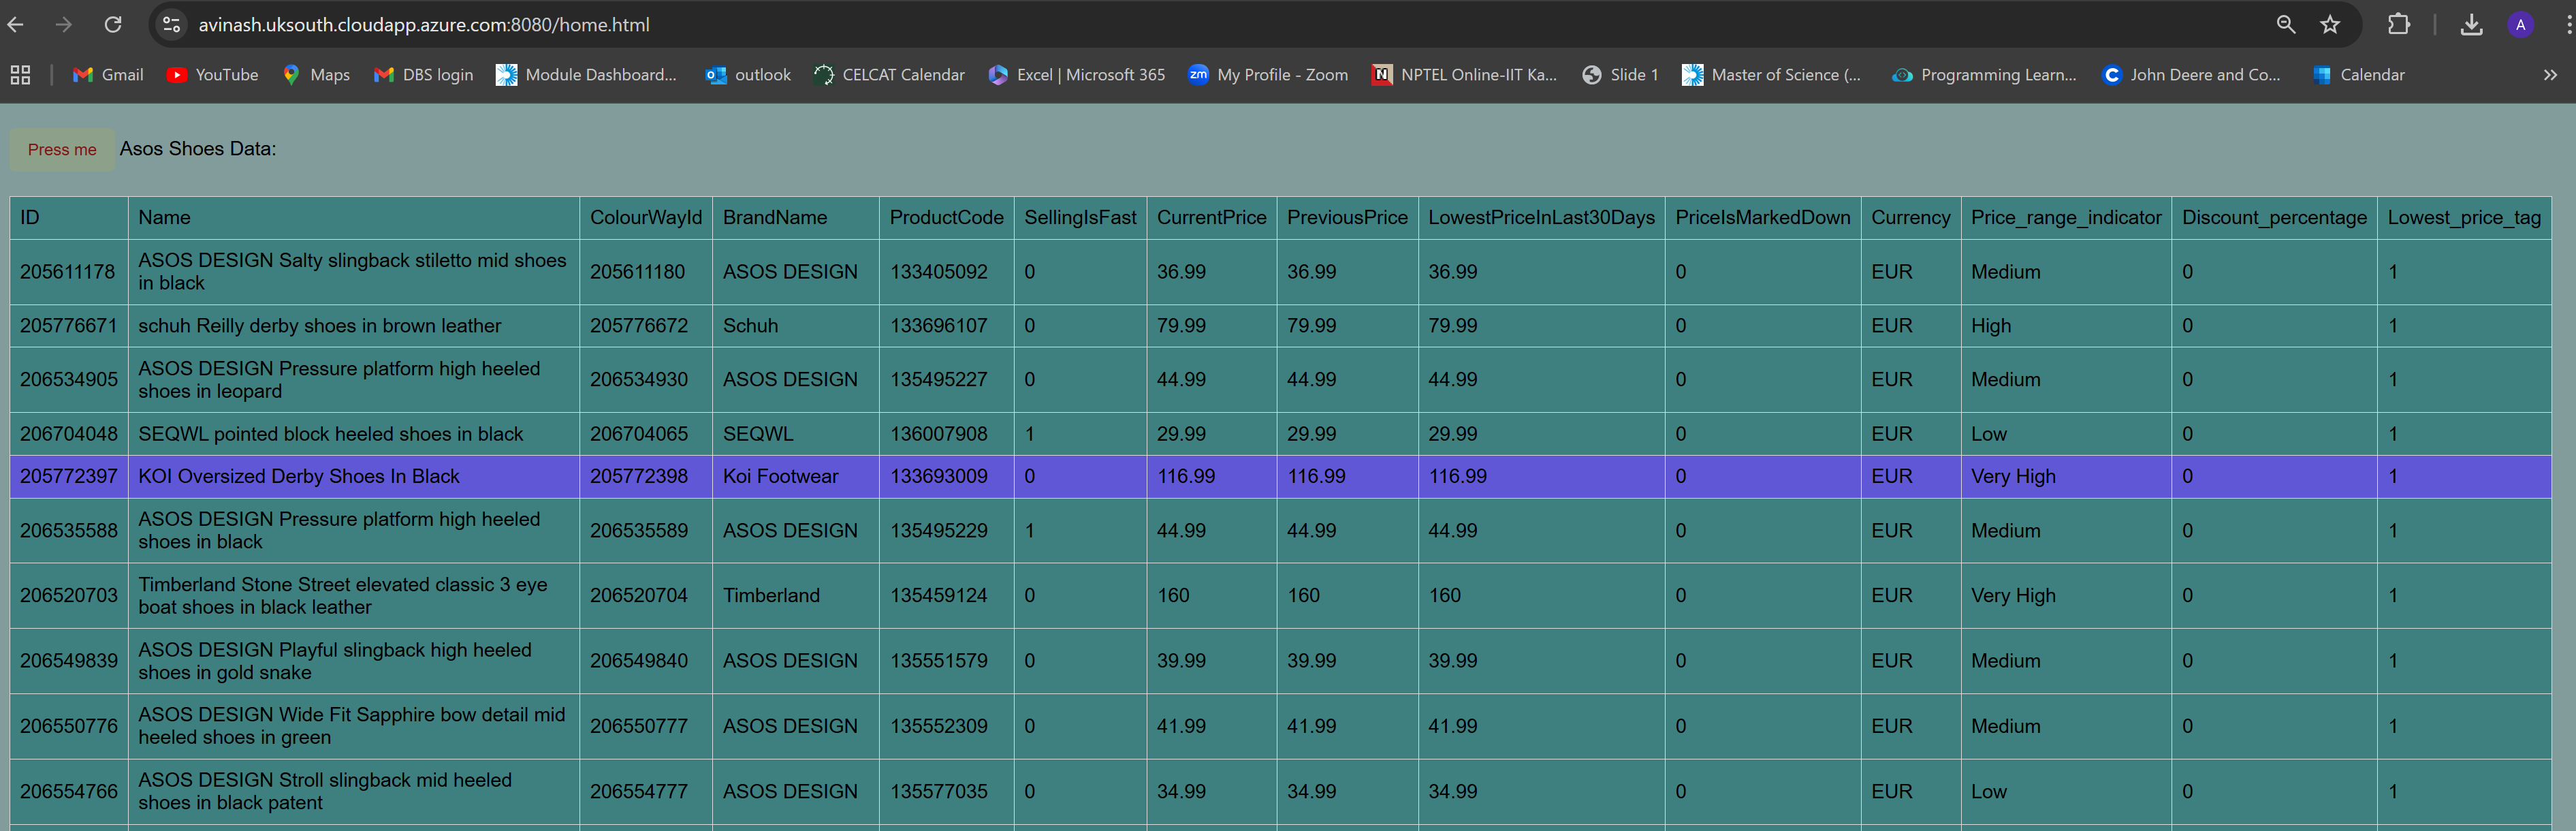

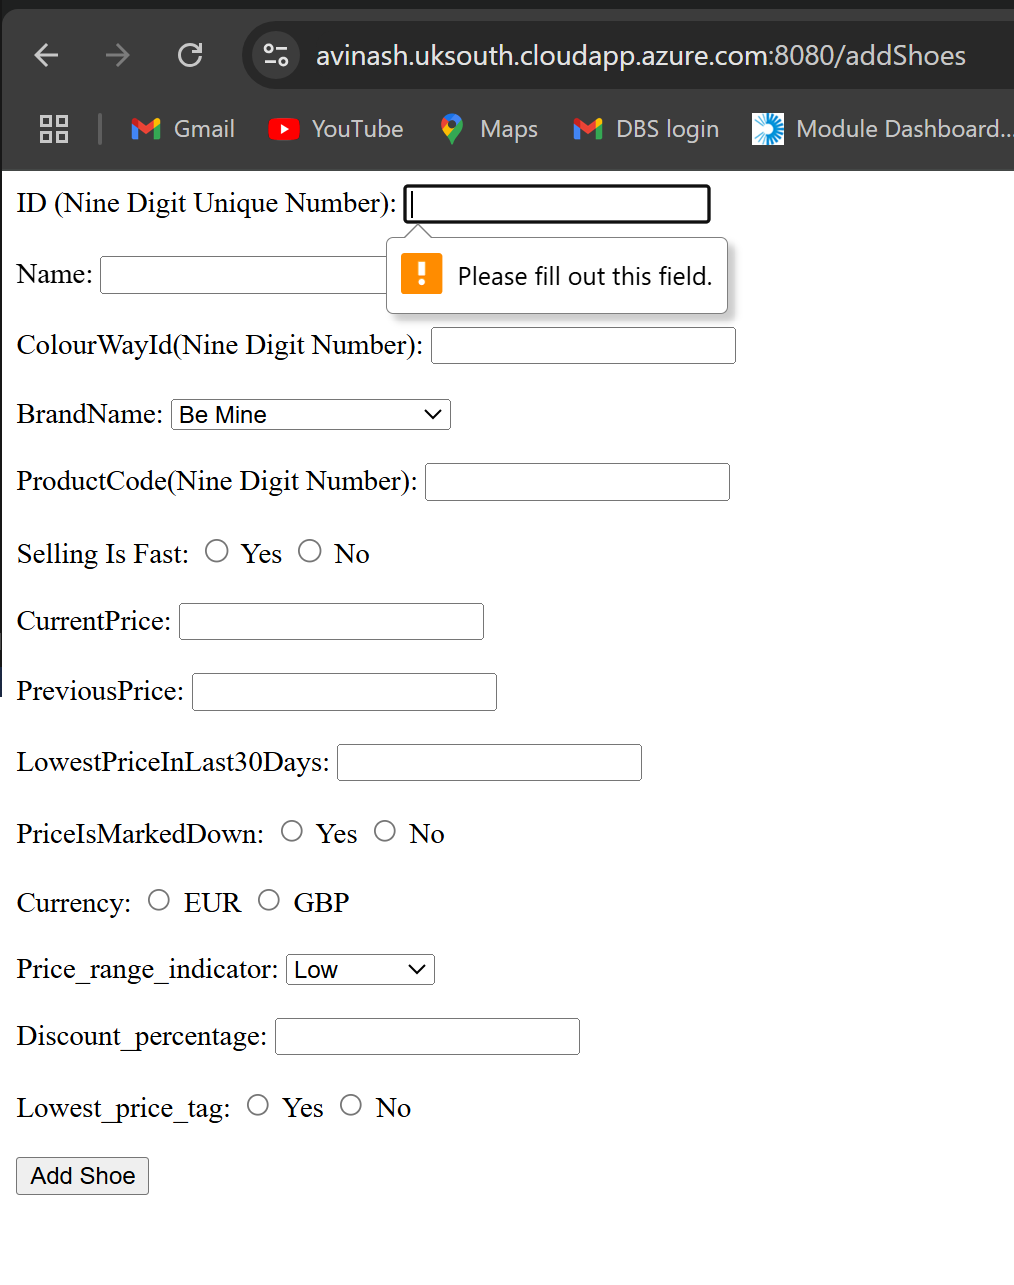